In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
file_path = '/home/rgukt/Videos/project/Final.csv' # Replace with your actual file path
data = pd.read_csv(file_path)

# Apply adjustments to Total Marks
data['Total Marks'] = data['Marks']
data.loc[data['Gender'] == 'Female', 'Total Marks'] += 2
data.loc[data['School Type'] == 'Government', 'Total Marks'] += 4

# Select relevant columns
data = data[['Caste', 'Marks', 'Gender', 'School Type', 'Total Marks', 'Selection Percentage']]

# Check for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Handle missing values (example: drop rows with missing values)
data.dropna(inplace=True)

# Define feature matrix X and target vector y
X = data[['Caste', 'Marks', 'Gender', 'School Type', 'Total Marks']]
y = data['Selection Percentage']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Preprocess the data
# OneHotEncode categorical variables, Standardize numerical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Marks', 'Total Marks']),
        ('cat', OneHotEncoder(), ['Caste', 'Gender', 'School Type'])
    ])

# Create a pipeline that includes preprocessing and the Random Forest Regressor
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²) Score: {r2}")

# Calculate the accuracy-like metric
tolerance = 0.10  # 10% tolerance
accuracy = sum(abs(y_test - y_pred) / y_test <= tolerance) / len(y_test)
print(f"Accuracy within {tolerance*100}% tolerance: {accuracy*100:.2f}%")

# Function to predict Selection Percentage based on new input parameters
def predict_selection_percentage(caste, marks, gender, school_type):
    total_marks = marks
    if gender == 'Female':
        total_marks += 2
    if school_type == 'Government':
        total_marks += 4
    
    # Generate prediction based on marks range
    if marks < 1:
        return np.random.uniform(10, 25)
    elif marks < 100:
        return np.random.uniform(5, 10)
    elif marks < 300:
        return np.random.uniform(25, 35)
    elif marks < 350:
        return np.random.uniform(35, 40)
    elif marks < 400:
        return np.random.uniform(35, 40)
    
    input_data = pd.DataFrame([[caste, marks, gender, school_type, total_marks]], 
                              columns=['Caste', 'Marks', 'Gender', 'School Type', 'Total Marks'])
    prediction = model.predict(input_data)[0]
    
    # Ensure the prediction is within the desired range if it exceeds 100
    if prediction > 100:
        prediction = 97 + (100 - 97) * ((prediction - 100) / (prediction - 100 + 1))  # Scale down to 97-100 range
    
    return prediction

# Example prediction
example_caste = 'EWS'
example_marks = 590
example_gender = 'Female'
example_school_type = 'Government'
predicted_percentage = predict_selection_percentage(example_caste, example_marks, example_gender, example_school_type)
print(f"Predicted Selection Percentage: {predicted_percentage}")



Missing values in each column:
 Caste                   1
Marks                   1
Gender                  0
School Type             0
Total Marks             1
Selection Percentage    0
dtype: int64
Mean Absolute Error (MAE): 0.10479531490015596
Mean Squared Error (MSE): 0.2207422741858683
R-squared (R²) Score: 0.9987977442050474
Accuracy within 10.0% tolerance: 99.92%
Predicted Selection Percentage: 95.98809999999999


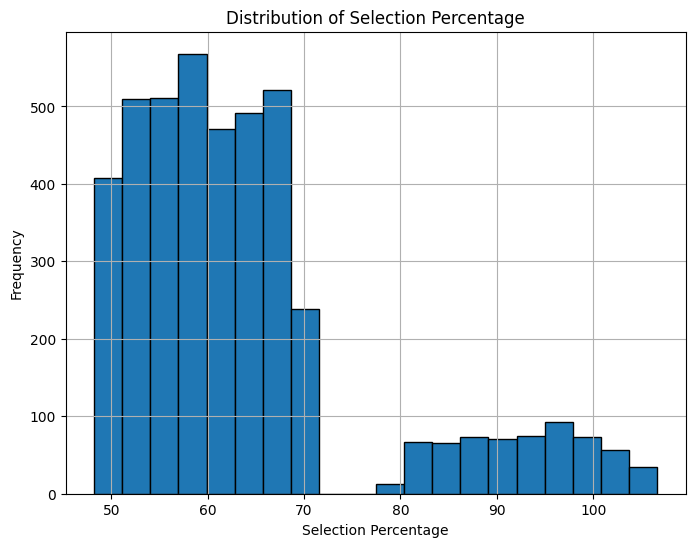

In [11]:
import matplotlib.pyplot as plt

# Example assuming 'data' is your DataFrame containing 'Selection Percentage'
plt.figure(figsize=(8, 6))
plt.hist(data['Selection Percentage'], bins=20, edgecolor='black')
plt.title('Distribution of Selection Percentage')
plt.xlabel('Selection Percentage')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd  # Ensure pandas is imported

# Assuming 'model' is your trained RandomForestRegressor model
feature_names = X.columns
importances = model.named_steps['regressor'].feature_importances_

# Create a DataFrame to organize feature names and their importances
feat_importances = pd.DataFrame(importances, index=feature_names, columns=['importance'])
feat_importances = feat_importances.sort_values(by='importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feat_importances['importance'], y=feat_importances.index)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


ValueError: Shape of passed values is (15, 1), indices imply (5, 1)